In [ ]:
class CullochPits:
    def __init__(self, weights, bias, threshold):
        """
        Initialize the CullochPits class.

        Args:
            weights (list or ndarray): The weights vector.
            bias (float): The bias term.
            threshold (float): The threshold value for prediction.
        """
        self.weights = weights
        self.bias = bias
        self.threshold = threshold

    def predict(self, input_vector):
        """
        Predict the output based on the input vector.

        Args:
            input_vector (list or ndarray): The input vector.

        Returns:
            int: 0 if the weighted sum is below the threshold, otherwise 1.
        """
        weighted_sum = input_vector @ self.weights + self.bias
        return int(weighted_sum >= self.threshold)


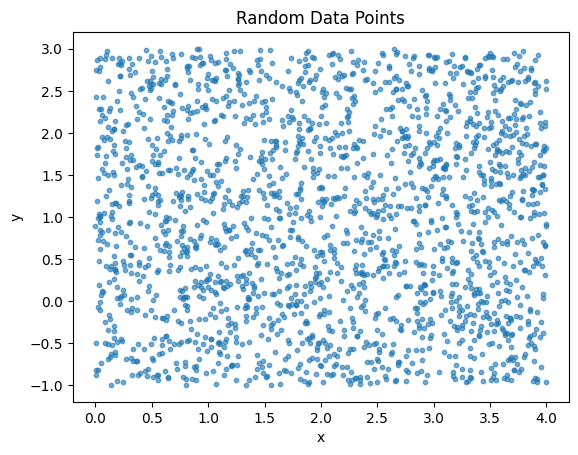

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize neurons
n1 = CullochPits(np.array([0, 1]), 0, 0)  # Should output 1
n2 = CullochPits(np.array([2, -1]), -2, 0)  # Should output 1
n3 = CullochPits(np.array([-2, -1]), 6, 0)  # Should output 1
output_neuron = CullochPits(np.array([1, 1, 1]), -3, 0)

# Generate random input data
num_points = 2000
x = [random.uniform(0, 4) for _ in range(num_points)]
y = [random.uniform(-1, 3) for _ in range(num_points)]

# Plotting setup (if you later wish to visualize the data)
plt.scatter(x, y, s=10, alpha=0.6)
plt.title("Random Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


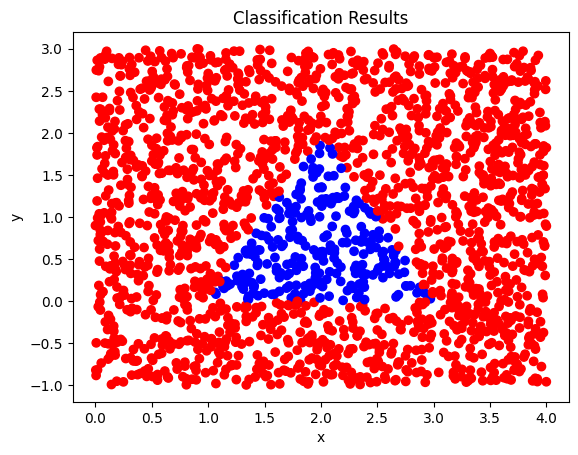

In [ ]:
# Reshape x and y into column vectors
x_new = np.array(x).reshape(-1, 1)
y_new = np.array(y).reshape(-1, 1)

# Combine x and y into a single array
tmp = np.hstack((x_new, y_new))

# Determine the color based on predictions
flag = [
    'blue' if output_neuron.predict(np.array([
        n1.predict(point),
        n2.predict(point),
        n3.predict(point)
    ])) else 'red'
    for point in tmp
]

# Plot the points with colors based on the flag
plt.scatter(tmp[:, 0], tmp[:, 1], c=flag)
plt.title("Classification Results")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
